# Machine Learning - Laboratory 2

Created by: daniel.kucharczyk@pwr.edu.pl

**Deadline:** Wednesday, October 16, at 11:59 PM CET.

---

1. Complete the implementation of `GradientDescentOptimizer` according to the best coding standard so that the class can be used in a way shown below.
2. For the provided case of $y=x^2$, create several plots with different values of `learning_rate` e.g $\{0.001, 0.1, 0.5, 0.9\}$. While plotting the results, try to use `subplots`.
3. Extend the notebook by adding an example dealing with the minimization of $f(x,y)=x^2 + y^2$ using the aforementioned class. Using `matplotlib` library generate the following plots:
    - A 3D surface plot of the function
    - A contour plot showing the optimization path

In [1]:
# Don't modify this line
import sys


sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from src.optimizers import GradientDescentOptimizer

In [3]:
# Define the cost function: f(x) = x^2
def cost_function(x):
    return x**2


# Define the gradient of the cost function: f'(x) = 2x
def gradient_function(x):
    return 2 * x


# Create an instance of the optimizer
optimizer = GradientDescentOptimizer(learning_rate=0.01, max_iterations=1000, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
history = np.array( cost_history )
path_x = history[ : ,0]
path_y = history[ : ,1]

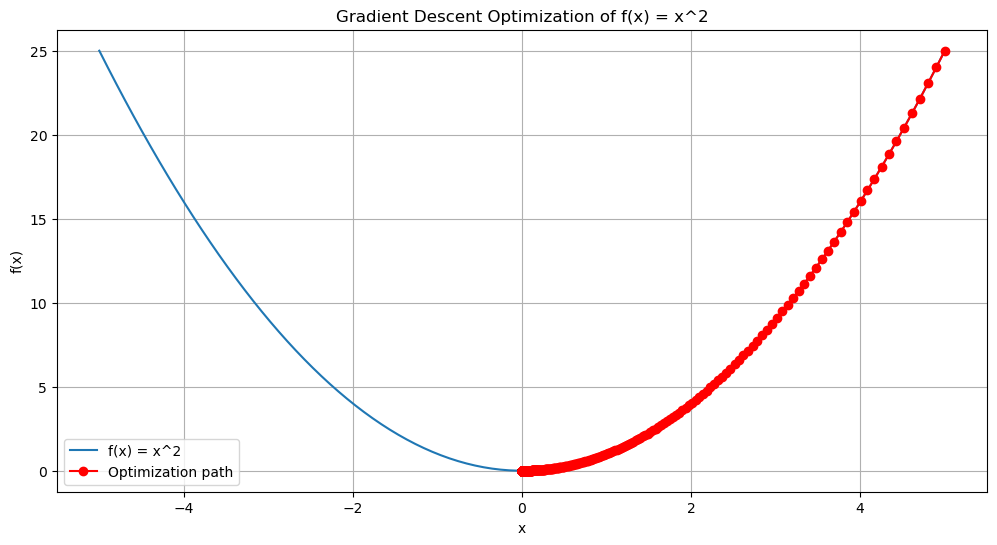

In [4]:
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
plt.plot(path_x, path_y, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.grid(True)
plt.show()

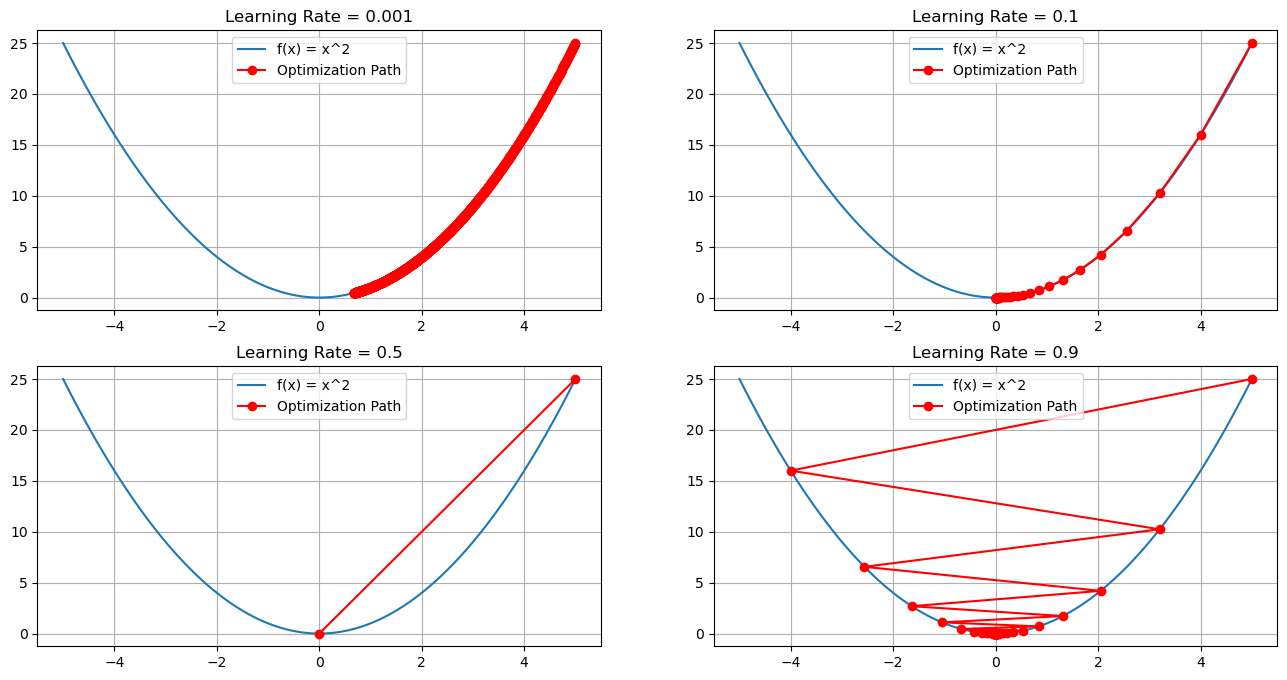

In [5]:
initial_x = 5.0
learning_list = [0.001 , .1 , .5 , .9]

x = np.linspace(-5, 5, 100)
y = cost_function(x)

### Plot
fig, axs = plt.subplots(2,2,figsize=(16, 8))

for q in range(len(learning_list)):
    optimizer = GradientDescentOptimizer(learning_rate=learning_list[q], max_iterations=1000, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    history = np.array( cost_history )
    path_x = history[ : ,0]
    path_y = history[ : ,1]
    axs[ int(q/2), q % 2].plot(x, y , label="f(x) = x^2")
    axs[ int(q/2), q % 2].plot(path_x, path_y , "ro-" , label="Optimization Path")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(learning_list[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)

$$ f(x,y) = x^2 + y^2 $$

In [6]:
def cost_function_2d(params):
    x, y = params
    return x**2 + y**2

def gradient_function_2d(params):
    x, y = params
    return [2*x , 2*y]

initial_params_2d = [4.0, 3.0]

optimizer_2d = GradientDescentOptimizer(learning_rate=.01, max_iterations=1000, tolerance=1e-6)
optimal_params_2d, cost_history_2d = optimizer_2d.optimize(cost_function_2d, gradient_function_2d, initial_params_2d)

x_path = np.array( [p[0] for p, j in cost_history_2d] )
y_path = np.array( [p[1] for p, j in cost_history_2d] )
z_path = np.array( [j for p , j in cost_history_2d] )

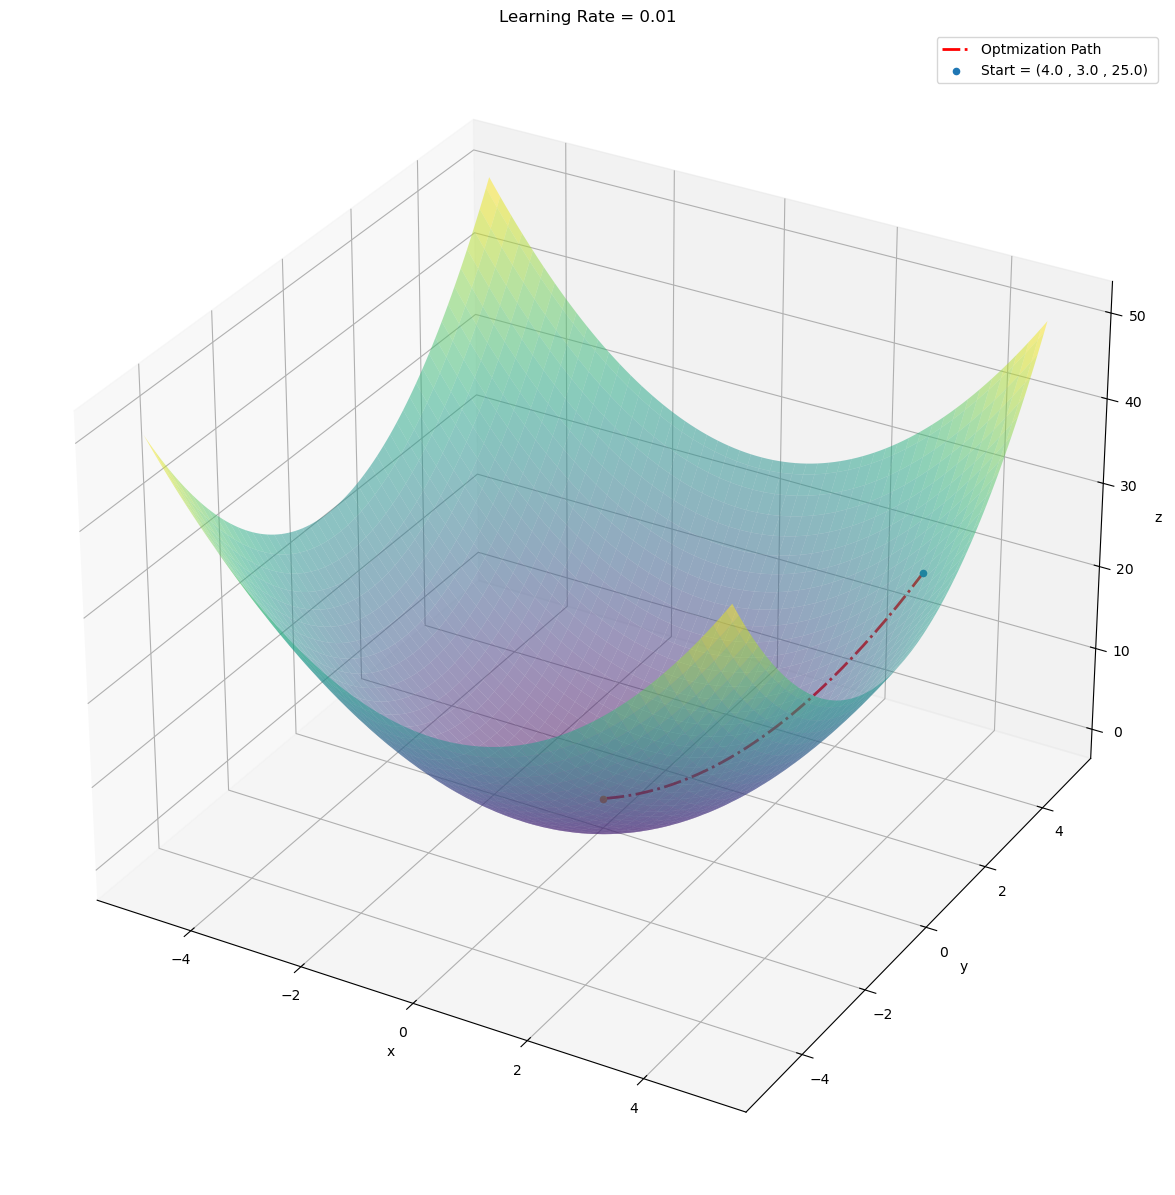

In [7]:
### Set the domain
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = cost_function_2d((X, Y))

### Plot the Surface
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis', alpha=0.5)
ax.plot3D(x_path, y_path, z_path,linestyle='-.',color='red' , linewidth=2 , label = "Optmization Path")
ax.scatter( initial_params_2d[0] , initial_params_2d[1] , cost_function_2d(initial_params_2d) , label="Start = ({} , {} , {}) ".format(initial_params_2d[0] , initial_params_2d[1] , cost_function_2d(initial_params_2d)) )
ax.scatter( x_path[-1] , y_path[-1] , z_path[-1])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Learning Rate = 0.01")
plt.legend()
plt.show()

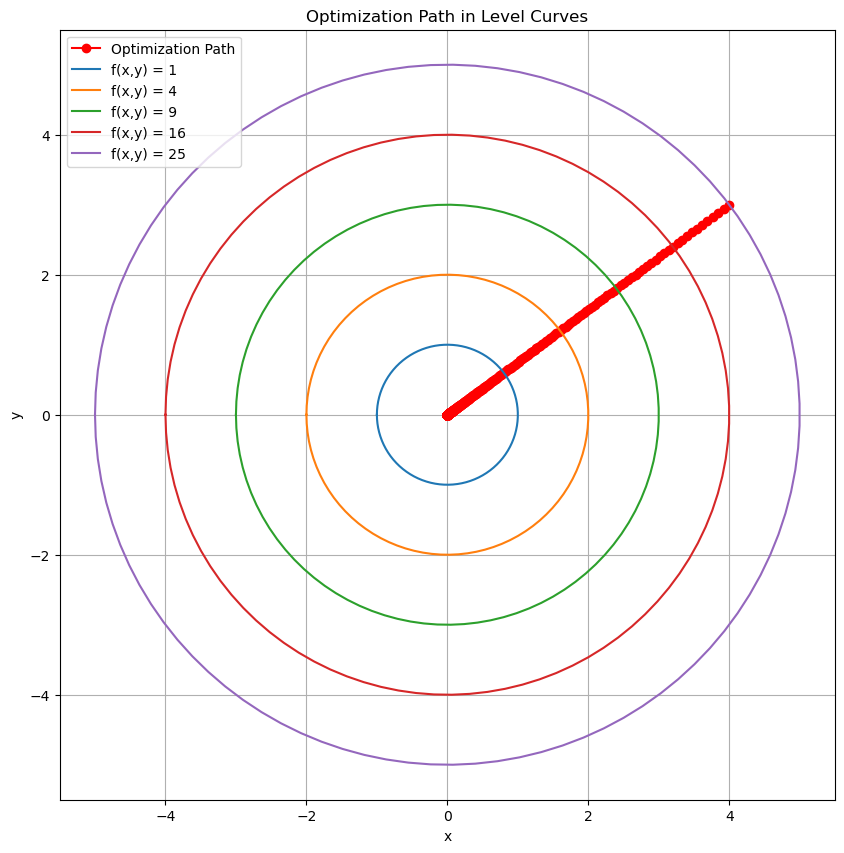

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(x_path , y_path , 'ro-' , label = "Optimization Path")
for q in range(1,6):
    x = q*np.cos( np.linspace(-np.pi , np.pi , 100) )
    y = q*np.sin( np.linspace(-np.pi , np.pi , 100) )
    plt.plot(x,y , label = "f(x,y) = {}".format(q**2))

plt.title("Optimization Path in Level Curves")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)